<a href="https://colab.research.google.com/github/c-wegman/ABW/blob/main/Companion_notebook_to_the_team_assignment_ABW_2022_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python<img src='https://developers.redhat.com/sites/default/files/styles/article_feature/public/blog/2014/09/python-logo.png?itok=NNQ6xBcf' align='after' width=180> for <img align='after' width='180' src='https://drive.google.com/uc?export=view&id=19qZe5VIxkIEm7_hYkrvlH142XPBxBaEf'> 
 # Data manipulations for a possible resolution of the team assignment


---
> This notebook processes the data from the excel sheet from [canvas](https://canvas.uva.nl/courses/25016/files/folder/Tutorials/Data) in order to obtain the information that you may need to solve the team Assignment 1. Feel free to make a copy of this notebook and add the code of your resolution to it. 
---

In [1]:
import sys
if 'google.colab' in sys.modules:
    import os
    from google.colab import files
    # just check if we already uploaded, may we restart the runtime and run all cells
    if not os.path.isfile('Data Set Feedcalculator.xlsx'):
        uploaded = files.upload()

Saving Data Set Feedcalculator.xlsx to Data Set Feedcalculator.xlsx


In [2]:
import sys
at_colab = "google.colab" in sys.modules

if at_colab:
    import shutil
    if not shutil.which("pyomo"):
        !pip install -q pyomo
        assert(shutil.which("pyomo"))
    if not shutil.which('/usr/bin/cbc'):
        !apt-get install -y -qq coinor-cbc
        assert(shutil.which('/usr/bin/cbc'))

     |████████████████████████████████| 9.7 MB 2.0 MB/s 
     |████████████████████████████████| 49 kB 6.0 MB/s 
Selecting previously unselected package coinor-libcoinutils3v5.
(Reading database ... 123942 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.10.14+repack1-1_amd64.deb ...
Unpacking coinor-libcoinutils3v5 (2.10.14+repack1-1) ...
Selecting previously unselected package coinor-libosi1v5.
Preparing to unpack .../1-coinor-libosi1v5_0.107.9+repack1-1_amd64.deb ...
Unpacking coinor-libosi1v5 (0.107.9+repack1-1) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.16.11+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.16.11+repack1-1) ...
Selecting previously unselected package coinor-libcgl1.
Preparing to unpack .../3-coinor-libcgl1_0.59.10+repack1-1_amd64.deb ...
Unpacking coinor-libcgl1 (0.59.10+repack1-1) ...
Selecting previously unselected package coinor-libcbc3.
Preparing to unp

# Read the data, as you have already seen [here]( https://colab.research.google.com/drive/1Q3fNgpa8QfGTzJ7lj-oZ8Ya0IIGCdnEr).

In [3]:
import pandas as pd
data = pd.read_excel('Data Set Feedcalculator.xlsx',sheet_name=None)

In [4]:
ingredients      = data['Ingredient Database']
nutrient_rules   = data['Nutrient Rules']
ingredient_rules = data['Ingredient Rules']

# Collect the ingredients that are available together with the relevant columns

In [5]:
available_ingredients = ingredients[ingredients.Availability][['Name','Reference name','Price']+list(nutrient_rules.Nutrient)].set_index('Reference name')
available_ingredients

,Name,Price,oebr,cp,cfibre,staew,ca,na,opp,dlysp,dmetp,dmcp,dthrp,dtryp,dvalp,dargp
Reference name,,,,,,,,,,,,,,,,
barley,Barley,0.26,2656.5,99.7,43.4,539.3,0.4,0.1,1.2,2.3,1.3,2.9,2.3,0.9,3.6,3.9
blood,Blood meal 80% CP,0.71,2450.0,800.0,10.0,0.0,0.5,5.8,1.3,51.3,6.9,13.8,25.4,8.7,49.6,24.8
boneash,Bone ash,0.18,0.0,0.0,0.0,0.0,289.3,9.5,82.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cotton,Cotton seed cake,0.20,1730.0,362.9,169.8,33.6,2.2,0.0,3.1,8.8,3.9,8.1,8.0,3.2,11.8,32.7
fish,Fish meal 56% CP,0.63,2862.0,563.0,0.0,0.0,60.0,10.5,19.6,38.5,14.3,18.8,20.1,5.6,32.3,30.6
fishlq,Fish meal 40% CP,0.55,0.0,384.0,0.0,0.0,141.0,10.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
gnseeds,Groundnut seeds,0.59,5243.0,287.1,23.3,0.0,1.0,0.0,1.7,7.5,2.8,5.9,5.8,2.4,9.5,28.1
maize,Maize/ Corn,0.33,3227.8,76.3,20.8,648.5,0.1,0.0,0.7,1.4,1.4,2.7,2.1,0.4,2.9,3.1
maizebranhighq,"Maize bran, high quality",0.19,2893.4,90.6,39.6,489.3,1.3,0.2,1.4,1.8,1.6,3.1,2.4,0.5,3.8,3.9


# Collect the nutrient bounds

Note that 'not available' in a data frame is not the same as None!

In [6]:
nutrient_bounds = { nut : (lb if not pd.isna(lb) else 0,     # no lower bound translates into 0 as lower bound
                           ub if not pd.isna(ub) else None)  # no upper bound becomes None
                    for nut,lb,ub in zip(nutrient_rules.Nutrient,nutrient_rules['Lower Bound'],nutrient_rules['Upper Bound']) 
                  }

In [7]:
nutrient_bounds

{'oebr': (2750.0, 2850.0),
 'cp': (155.0, 195.0),
 'cfibre': (0, 75.0),
 'staew': (300.0, None),
 'ca': (7.0, 9.0),
 'na': (1.4, 2.1),
 'opp': (3.5, None),
 'dlysp': (6.7, 7.9),
 'dmetp': (2.8, None),
 'dmcp': (5.1, 6.1),
 'dthrp': (4.5, None),
 'dtryp': (1.3, None),
 'dvalp': (5.4, None),
 'dargp': (7.0, None)}

# Collect the ingredient bounds

Note again that 'not available' in a data frame is not the same as None!

In [8]:
ingredient_bounds = { ing : (lb if not pd.isna(lb) else 0,    # no lower bound translates into 0 as lower bound
                             ub if not pd.isna(ub) else None) # no upper bound becomes None
                      for ing,lb,ub in zip(ingredient_rules.Ingredient,ingredient_rules['Lower Bound'],ingredient_rules['Upper Bound']) }

In [9]:
ingredient_bounds

{'barley': (0, 0.1),
 'blood': (0, 0.03),
 'boneash': (0, 0.03),
 'mbmeal': (0, 0.05),
 'mbmeal2': (0, 0.08),
 'cotton': (0, 0.06),
 'copra': (0, 0.07),
 'fats': (0, 0.05),
 'fish': (0, 0.07),
 'fishlq': (0, 0.07),
 'maize': (0.2, None),
 'maizebranhighq': (0, 0.25),
 'maizebranlowq': (0, 0.15),
 'sugars': (0, 0.01),
 'rapecake': (0, 0.06),
 'rapemeal': (0, 0.06),
 'rice': (0, 0.15),
 'gnseeds': (0, 0.1),
 'gncake': (0, 0.08),
 'soybeanexp': (0, 0.07),
 'soybeanmeal': (0, 0.32),
 'soybeanmealhp': (0, 0.33),
 'soybeanheat': (0, 0.3),
 'sunflower': (0, 0.12),
 'sesamecake': (0, 0.12),
 'wheat': (0, 0.25),
 'wheatbran': (0, 0.08),
 'tapbran': (0, 0.2),
 'caswhole': (0, 0.25),
 'casfine': (0, 0.25),
 'cascoarse': (0, 0.15),
 'sunflowerseeds': (0, 0.12),
 'lime': (0, 0.02),
 'salt': (0, 0.003)}

# Collect the combined ingredient rules

This is slightly more complex, as we need to know where this data is placed in the sheet, hence the data frame. 
Note how we use `.dropna()` on series to leave only the values defined. 
Note as well how we filter the ingredients that are not available. 
It may happen that a combined rule disappears, because it did only relate to not available ingredients. 

If you want to know where the `Unnamed: ` columns are comming from, just examine the `ingredient_rules` data frame. 


In [10]:
combined_ingredient_rules   = [] 
set_of_availabe_ingredients = set(available_ingredients.index)
for c in ['Unnamed: '+str(i) for i in range(5,13)]:
    aux = ingredient_rules[[c]].dropna().values
    aux = [ v[0] for v in aux ]
    upperbound          = aux[0]
    ingredients_in_rule = set(aux[1:]).intersection(set_of_availabe_ingredients)
    if ingredients_in_rule:
        combined_ingredient_rules.append((upperbound,ingredients_in_rule))
combined_ingredient_rules

[(0.17, {'cotton', 'sunflower'}),
 (0.35, {'soybeanexp', 'soybeanmeal'}),
 (0.3, {'barley'}),
 (0.25, {'maizebranhighq', 'maizebranlowq'}),
 (0.07, {'fish', 'fishlq'}),
 (0.08, {'mbmeal'}),
 (0.25, {'casfine', 'caswhole', 'tapbran'})]

Exercise 1

In [11]:
ingredient_bounds['lysine']=(0, None)
ingredient_bounds['dl']=(0, None)
ingredient_bounds['ltryp']=(0, None)
ingredient_bounds['dicaph']=(0, None)
ingredient_bounds['shells']=(0, None)

In [12]:
import pyomo.environ as pyo
from pyomo.core.base.set_types import NonNegativeReals

def model_pyjama():

  model              = pyo.ConcreteModel('Geitjes')
  model.ingredients  = pyo.Set(initialize=available_ingredients.index)
  model.nutrients    = pyo.Set(initialize=nutrient_bounds.keys())

  model.x            = pyo.Var(model.ingredients, within=NonNegativeReals, bounds=ingredient_bounds)

  model.one          = pyo.Constraint(expr = pyo.quicksum(model.x[i] for i in model.ingredients) == 1)
  model.combined     = pyo.ConstraintList()
  for bounty,dingentje in combined_ingredient_rules:
    model.combined.add(expr = pyo.quicksum(model.x[i] for i in dingentje) <= bounty)

  @model.Constraint( model.nutrients )
  def nut_low( model, j ):
    return pyo.quicksum( model.x[i]*available_ingredients.loc[i,j] for i in model.ingredients ) >= nutrient_bounds[j][0]
  
  @model.Constraint( model.nutrients )
  def nut_up( model, j ):
    return pyo.quicksum( model.x[i]*available_ingredients.loc[i,j] for i in model.ingredients ) <= nutrient_bounds[j][1]
  
  model.cost         = pyo.Objective(sense = pyo.minimize, expr = pyo.quicksum(available_ingredients.Price[i]*model.x[i] for i in model.ingredients))

  return model

model_pyjama().pprint()
model = model_pyjama()
results = pyo.SolverFactory('cbc',executable='/usr/bin/cbc').solve(model)
print(results.solver.status, results.solver.termination_condition )
print( model.cost(), model.x.extract_values() )

3 Set Declarations
    combined_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    7 : {1, 2, 3, 4, 5, 6, 7}
    ingredients : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   26 : {'barley', 'blood', 'boneash', 'cotton', 'fish', 'fishlq', 'gnseeds', 'maize', 'maizebranhighq', 'maizebranlowq', 'mbmeal', 'sugars', 'soybeanexp', 'soybeanmeal', 'sunflower', 'sunflowerseeds', 'tapbran', 'caswhole', 'casfine', 'wheatbran', 'lysine', 'dl', 'ltryp', 'dicaph', 'shells', 'salt'}
    nutrients : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   14 : {'oebr', 'cp', 'cfibre', 'staew', 'ca', 'na', 'opp', 'dlysp', 'dmetp', 'dmcp', 'dthrp', 'dtryp', 'dvalp', 'dargp'}

1 Var Declarations
    x : Size=26, Index=ingredients
        Key            : Lower : Value : Upper : Fixed : Stale : Dom

Exercise 2

In [13]:
import pyomo.environ as pyo
from pyomo.core.base.set_types import NonNegativeReals, Binary

def model_pyjama():

  model              = pyo.ConcreteModel('Geitjes')
  model.ingredients  = pyo.Set(initialize=available_ingredients.index)
  model.nutrients    = pyo.Set(initialize=nutrient_bounds.keys())

  model.x            = pyo.Var(model.ingredients, within=NonNegativeReals, bounds=ingredient_bounds)
  model.y            = pyo.Var(model.ingredients, within=Binary)

  model.one          = pyo.Constraint(expr = pyo.quicksum(model.x[i] for i in model.ingredients) == 1)
  model.combined     = pyo.ConstraintList()
  for bounty,dingentje in combined_ingredient_rules:
    model.combined.add(expr = pyo.quicksum(model.x[i] for i in dingentje) <= bounty)

  @model.Constraint( model.nutrients )
  def nut_low( model, j ):
    return pyo.quicksum( model.x[i]*available_ingredients.loc[i,j] for i in model.ingredients ) >= nutrient_bounds[j][0]
  
  @model.Constraint( model.nutrients )
  def nut_up( model, j ):
    return pyo.quicksum( model.x[i]*available_ingredients.loc[i,j] for i in model.ingredients ) <= nutrient_bounds[j][1]
  
  @model.Constraint( model.ingredients )
  def included( model, i ):
    return model.y[i] >= model.x[i]
  
  model.amount       = pyo.Objective(sense = pyo.minimize, expr = pyo.quicksum(model.y[i] for i in model.ingredients))

  return model


model = model_pyjama()
results = pyo.SolverFactory('cbc',executable='/usr/bin/cbc').solve(model)
print(results.solver.status, results.solver.termination_condition )
print( model.amount(), model.x.extract_values() )
model.pprint()

ok optimal
5.0 {'barley': 0.0, 'blood': 0.0, 'boneash': 0.02662492, 'cotton': 0.0, 'fish': 0.0, 'fishlq': 0.0, 'gnseeds': 0.0, 'maize': 0.66196751, 'maizebranhighq': 0.0, 'maizebranlowq': 0.0, 'mbmeal': 0.0, 'sugars': 0.0, 'soybeanexp': 0.0, 'soybeanmeal': 0.30719143, 'sunflower': 0.0, 'sunflowerseeds': 0.0, 'tapbran': 0.0, 'caswhole': 0.0, 'casfine': 0.0, 'wheatbran': 0.0, 'lysine': 0.0, 'dl': 0.0012161349, 'ltryp': 0.0, 'dicaph': 0.0, 'shells': 0.0, 'salt': 0.003}
3 Set Declarations
    combined_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    7 : {1, 2, 3, 4, 5, 6, 7}
    ingredients : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   26 : {'barley', 'blood', 'boneash', 'cotton', 'fish', 'fishlq', 'gnseeds', 'maize', 'maizebranhighq', 'maizebranlowq', 'mbmeal', 'sugars', 'soybeanexp', 'soybeanmeal', 'sunflower', 'sunflowerseeds', 'tapbra

Exercise 3

In [21]:
import pyomo.environ as pyo
from pyomo.core.base.set_types import NonNegativeReals, Binary

def model_pyjama(limit):

  model              = pyo.ConcreteModel('Geitjes')
  model.ingredients  = pyo.Set(initialize=available_ingredients.index)
  model.nutrients    = pyo.Set(initialize=nutrient_bounds.keys())

  model.x            = pyo.Var(model.ingredients, within=NonNegativeReals, bounds=ingredient_bounds)
  model.y            = pyo.Var(model.ingredients, within=Binary)

  model.max_ingr     = pyo.Constraint(expr = pyo.quicksum(model.y[i] for i in model.ingredients) <= limit)
  model.one          = pyo.Constraint(expr = pyo.quicksum(model.x[i] for i in model.ingredients) == 1)
  model.combined     = pyo.ConstraintList()
  for bounty,dingentje in combined_ingredient_rules:
    model.combined.add(expr = pyo.quicksum(model.x[i] for i in dingentje) <= bounty)

  @model.Constraint( model.nutrients )
  def nut_low( model, j ):
    return pyo.quicksum( model.x[i]*available_ingredients.loc[i,j] for i in model.ingredients ) >= nutrient_bounds[j][0]
  
  @model.Constraint( model.nutrients )
  def nut_up( model, j ):
    return pyo.quicksum( model.x[i]*available_ingredients.loc[i,j] for i in model.ingredients ) <= nutrient_bounds[j][1]
  
  @model.Constraint( model.ingredients )
  def included( model, i ):
    return model.y[i] >= model.x[i]
  
  #model.amount       = pyo.Objective(sense = pyo.minimize, expr = pyo.quicksum(model.y[i] for i in model.ingredients))
  model.cost         = pyo.Objective(sense = pyo.minimize, expr = pyo.quicksum(available_ingredients.Price[i]*model.x[i] for i in model.ingredients))

  return model

l_ingredients = range(5,len(available_ingredients.index))
l_cost = []

for limitje in l_ingredients:
  model = model_pyjama(limitje)
  results = pyo.SolverFactory('cbc',executable='/usr/bin/cbc').solve(model)
  l_cost.append(model.cost())
  print(limitje, model.cost())



#model = model_pyjama()
#results = pyo.SolverFactory('cbc',executable='/usr/bin/cbc').solve(model)
#print(results.solver.status, results.solver.termination_condition )
#print( model.cost(), model.x.extract_values() )
#model.pprint()

5 0.341822823725
6 0.30639739962000007
7 0.29463791437500003
8 0.287444290295
9 0.28071639755500005
10 0.27511009050499996
11 0.2731763318425
12 0.2706903575325
13 0.2697643896412
14 0.2697643896412
15 0.2697643896412
16 0.2697643896412
17 0.2697643896412
18 0.2697643896412
19 0.2697643896412
20 0.2697643896412
21 0.2697643896412
22 0.2697643896412
23 0.2697643896412
24 0.2697643896412
25 0.2697643896412


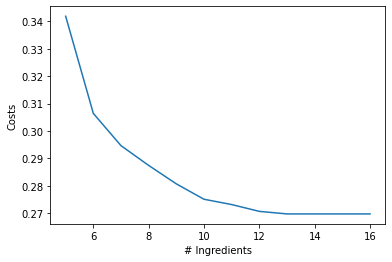

In [33]:
pd.Series(l_cost, index=l_ingredients)[0:12].plot(xlabel="# Ingredients", ylabel="Costs")